In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
A = [[2,1,-1],[1,-3,1],[1,3,-3]]

In [3]:
A=np.array(A)

In [4]:
type(A)

numpy.ndarray

In [5]:
A[1,]

array([ 1, -3,  1])

In [6]:
print(A)

[[ 2  1 -1]
 [ 1 -3  1]
 [ 1  3 -3]]


In [7]:
len(A)

3

In [11]:
n = len(A)
I = np.zeros((n,n))
for i in range(n):
    I[i,i]=1
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [36]:
def elimination(row1, row2, col, target=0):
    factor =((row2[col]-target)/row1[col])
    row2 = row2-row1*factor

def gauss(A):
    for i in range(len(A)):
        if A[i][i] == 0:
            for j in range(i+1, len(A)):
                if A[i][j]!=0:
                    A[i], A[j] = A[j],A[i]
                    break
            else:
                raise ValueError("Matrix is not invertible!")
        for j in range(i+1, len(A)):
            elimination(A[i], A[j], i)
    for i in range(len(A-1),-1,-1):
        for j in range(i-1, -1, -1):
            elimination(A[i], A[j], i)
    for i in range(len(A)):
        elimination(A[i], A[i], i, target=1)
    return A
            

def inverse(A):
    
    #生成一個單位矩陣
    n = len(A)
    I = np.zeros((n,n))
    for i in range(n):
        I[i,i]=1
    
    #concate A及I
    A_I = copy.deepcopy(A)
    A_I = np.concatenate((A_I, I, axis=1))
    
    #對concate後的矩陣做高斯消去
    gauss(A_inverse)
    
    #取A_I右半部為A之反矩陣
    A_inverse = A_I[:, (A_I.shape[1]//2):]
    
    return A_inverse

In [37]:
elimination(A[0,],A[1,],0)
print(A[1,])

factor= 0.5
1 2 0.5
[ 0.  -3.5  1.5]
[ 1 -3  1]


In [39]:
df = pd.read_csv("testfile.txt", header=None)
df.columns = ['obs_x', 'obs_y']
df

,obs_x,obs_y
0,-5.000000,51.764052
1,-4.795918,45.423064
2,-4.591837,41.274448
3,-3.979592,26.636216
4,-3.571429,20.256806
5,-2.959184,11.618429
6,-2.755102,10.450525
7,-1.734694,1.848098
8,-1.326531,-1.040535
9,-0.918367,-4.614631


In [41]:
obs_x, obs_y = df['obs_x'], df['obs_y']


In [42]:
np.power(obs_x, 2)

0     25.000000
1     23.000833
2     21.084965
3     15.837151
4     12.755102
5      8.756768
6      7.590587
7      3.009163
8      1.759683
9      0.843399
10     0.510204
11     0.093711
12     0.010412
13     0.510204
14     1.259892
15     3.009163
16     3.758850
17     6.507705
18     8.756768
19    15.837151
20    19.252395
21    21.084965
22    25.000000
Name: obs_x, dtype: float64

In [44]:
np.expand_dims(np.power(obs_x, 2), axis=1)

array([[2.50000000e+01],
       [2.30008330e+01],
       [2.10849646e+01],
       [1.58371512e+01],
       [1.27551020e+01],
       [8.75676801e+00],
       [7.59058726e+00],
       [3.00916285e+00],
       [1.75968347e+00],
       [8.43398584e-01],
       [5.10204082e-01],
       [9.37109538e-02],
       [1.04123282e-02],
       [5.10204082e-01],
       [1.25989171e+00],
       [3.00916285e+00],
       [3.75885048e+00],
       [6.50770512e+00],
       [8.75676801e+00],
       [1.58371512e+01],
       [1.92523948e+01],
       [2.10849646e+01],
       [2.50000000e+01]])

In [62]:
X_design_matrix = []
for i in range(2, -1, -1):
    print(i)
    X_design_matrix = np.append(X_design_matrix, np.expand_dims(np.power(obs_x, i), axis=1))

2
1
0


In [63]:
X_design_matrix

array([ 2.50000000e+01,  2.30008330e+01,  2.10849646e+01,  1.58371512e+01,
        1.27551020e+01,  8.75676801e+00,  7.59058726e+00,  3.00916285e+00,
        1.75968347e+00,  8.43398584e-01,  5.10204082e-01,  9.37109538e-02,
        1.04123282e-02,  5.10204082e-01,  1.25989171e+00,  3.00916285e+00,
        3.75885048e+00,  6.50770512e+00,  8.75676801e+00,  1.58371512e+01,
        1.92523948e+01,  2.10849646e+01,  2.50000000e+01, -5.00000000e+00,
       -4.79591837e+00, -4.59183673e+00, -3.97959184e+00, -3.57142857e+00,
       -2.95918367e+00, -2.75510204e+00, -1.73469388e+00, -1.32653061e+00,
       -9.18367347e-01, -7.14285714e-01, -3.06122449e-01,  1.02040816e-01,
        7.14285714e-01,  1.12244898e+00,  1.73469388e+00,  1.93877551e+00,
        2.55102041e+00,  2.95918367e+00,  3.97959184e+00,  4.38775510e+00,
        4.59183673e+00,  5.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  

C:\Users\Special\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Special\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Special\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


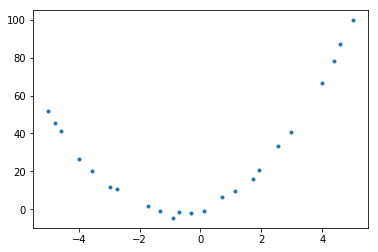

In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import copy
train_df = pd.read_csv("testfile.txt")
# 直接讀進來第一列會不見
train_df_first_row = train_df.columns
train_df.columns = ['x_train', 'y_train']
train_df_first_row = pd.DataFrame([train_df_first_row])
train_df_first_row.columns = ['x_train', 'y_train']
train_df = pd.concat([train_df_first_row, train_df], ignore_index=True)
x_train, y_train = train_df['x_train'], train_df['y_train']
x_train = x_train.astype(np.float64) 
y_train = y_train.astype(np.float64)
plt.plot(x_train, y_train, '.')

In [79]:
def eliminate(r1, r2, col, target=0):
    fac = (r2[col]-target) / r1[col]
    for i in range(len(r2)):
        r2[i] -= fac * r1[i]
def gauss(A):
    for i in range(len(A)):
        if A[i][i] == 0:
            for j in range(i+1, len(A)):
                if A[i][j] != 0:
                    A[i], A[j] = A[j], A[i]
                    break
            else:
                # rank < n
                raise ValueError("Matrix is not invertible")
        for j in range(i+1, len(A)):
            eliminate(A[i], A[j], i)
    for i in range(len(A)-1, -1, -1):
        for j in range(i-1, -1, -1):
            eliminate(A[i], A[j], i)
    for i in range(len(A)):
        eliminate(A[i], A[i], i, target=1)
    return A  
def inverse(A):
    tmp = copy.deepcopy(A)
    tmp = np.concatenate((tmp, np.identity(len(A))), axis=1)
    """
    for i,row in enumerate(A):
        assert len(row) == len(A)
        tmp[i].extend(row + [0]*i + [1] + [0]*(len(A)-i-1))
    """
    #print(tmp)
    gauss(tmp)
    #print(tmp)
    #ret = []
    ret = tmp[:, (tmp.shape[1]//2):]
    """
    for i in range(len(tmp)):
        ret.append(tmp[i][(tmp[i].shape[0])//2:])
    """
    #print(ret)
    return ret
def LSE(x_train, y_train, n, lamda):
    X_b = np.expand_dims(np.power(x_train, n-1), axis=1)
    for i in range(n-2, -1, -1):
        X_b = np.append(X_b, np.expand_dims(np.power(x_train, i), axis=1), axis=1)
    print(X_b)
    print(type(X_b))
    print(X_b.shape)
    y_train = np.expand_dims(y_train, axis=1)
    X_b_T = np.transpose(X_b)
    ATA = X_b_T.dot(X_b)
    print("ATA=", ATA)
    sol = inverse(X_b_T.dot(X_b) + np.identity(len(X_b_T))*lamda).dot(X_b_T).dot(y_train)
    print("ATA+lamdaI=", X_b_T.dot(X_b) + np.identity(len(X_b_T))*lamda)
    print("ATb=", X_b_T.dot(y_train))
    print("ATA+lamdaI_inverse=", inverse(X_b_T.dot(X_b) + np.identity(len(X_b_T))*lamda))
    print("LSE=", sol)
    sol = sol.tolist()
    fitting_line = ""
    for i in range(len(sol)-1, -1, -1):
        if i==0:
            fitting_line += str(sol[len(sol)-1-i][0])
        else:
            fitting_line += str(sol[len(sol)-1-i][0]) + "X^" + str(i) + " + "
    cost = cal_error(sol, X_b, y_train)
    return sol, fitting_line, cost
def Newton(x_train, y_train, n, lamda):
    X_b = np.expand_dims(np.power(x_train, n-1), axis=1)
    for i in range(n-2, -1, -1):
        X_b = np.append(X_b, np.expand_dims(np.power(x_train, i), axis=1), axis=1)
    y_train = np.expand_dims(y_train, axis=1)
    X_b_T = np.transpose(X_b)
    sol = inverse(X_b_T.dot(X_b)).dot(X_b_T).dot(y_train)
    sol = sol.tolist()
    fitting_line = ""
    for i in range(len(sol)-1, -1, -1):
        if i==0:
            fitting_line += str(sol[len(sol)-1-i][0])
        else:
            fitting_line += str(sol[len(sol)-1-i][0]) + "X^" + str(i) + " + "
    cost = cal_error(sol, X_b, y_train)
    return sol, fitting_line, cost
def cal_error(theta, X, Y):
    predictions = X.dot(theta)
    cost =  np.sum(np.square(predictions-Y))
    return cost
def draw(x_data, y_data, sol):
    sol = np.squeeze(sol)
    polynomial = np.poly1d(sol)
    x_axis = np.linspace(-6, 6)
    y_axis = polynomial(x_axis)
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 2, 1])
    axes.plot(x_axis, y_axis)
    axes.plot(x_data, y_data, '.')
    plt.show()
n = [2, 3, 3]
lamda = [0, 0, 10000]
for j in range(3):
    print("Case {}: n = {},lamda = {}".format(j+1, n[j], lamda[j]))
    sol_LSE, fitting_line, cost = LSE(x_train, y_train, n[j], lamda[j])
    '''
    print("LSE:")
    print("Fitting line: {}".format(fitting_line))
    print("Total error: {}".format(cost))
    #print("\n")
    sol_Newton, fitting_line, cost = Newton(x_train, y_train, n[j], lamda[j])
    print("Newton's Method:")
    print("Fitting line: {}".format(fitting_line))
    print("Total error: {}".format(cost))
    draw(x_train, y_train, sol_LSE)
    draw(x_train, y_train, sol_Newton)
    print("\n")
    '''

Case 1: n = 2,lamda = 0
[[-5.          1.        ]
 [-4.79591837  1.        ]
 [-4.59183673  1.        ]
 [-3.97959184  1.        ]
 [-3.57142857  1.        ]
 [-2.95918367  1.        ]
 [-2.75510204  1.        ]
 [-1.73469388  1.        ]
 [-1.32653061  1.        ]
 [-0.91836735  1.        ]
 [-0.71428571  1.        ]
 [-0.30612245  1.        ]
 [ 0.10204082  1.        ]
 [ 0.71428571  1.        ]
 [ 1.12244898  1.        ]
 [ 1.73469388  1.        ]
 [ 1.93877551  1.        ]
 [ 2.55102041  1.        ]
 [ 2.95918367  1.        ]
 [ 3.97959184  1.        ]
 [ 4.3877551   1.        ]
 [ 4.59183673  1.        ]
 [ 5.          1.        ]]
<class 'numpy.ndarray'>
(23, 2)
ATA= [[225.22907122  -3.57142857]
 [ -3.57142857  23.        ]]
ATA+lamdaI= [[225.22907122  -3.57142857]
 [ -3.57142857  23.        ]]
ATb= [[893.76355001]
 [658.21534285]]
ATA+lamdaI_inverse= [[0.00445088 0.00069113]
 [0.00069113 0.04358558]]
LSE= [[ 4.43295031]
 [29.30640471]]
Case 2: n = 3,lamda = 0
[[ 2.50000000e+01 

In [70]:
A = [[1, 2, 3],[1, 2, 3]]

In [71]:
A

[[1, 2, 3], [1, 2, 3]]

In [73]:
type(A)

list

In [74]:
def Transpose(matrix):
    m = len(matrix)
    n = len(matrix[0])
    result = []
    for i in range(n):
        result.append(tuple([matrix[j][i] for j in range(m)]))
    return result

In [75]:
Transpose(A)

[(1, 1), (2, 2), (3, 3)]

In [76]:
len(A)

2

In [77]:
len(A[0])

3